In [1]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)



<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

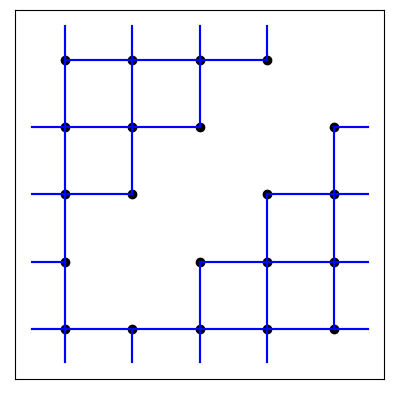

In [6]:
# Create an instance of the diagonally striped lattice
N=5

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, kind='dDSL')
 

#lat.plot_lattice();
lat.plot_nn();

In [7]:
k=np.linspace(0,np.pi, 100)

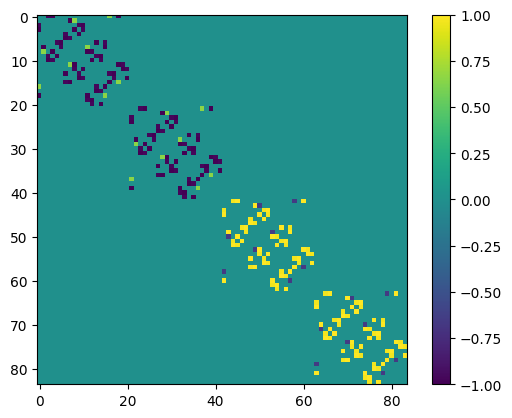

In [8]:
plt.imshow(np.real(ham.Hk(k[40], k[0],o=0)[0]))
plt.colorbar()

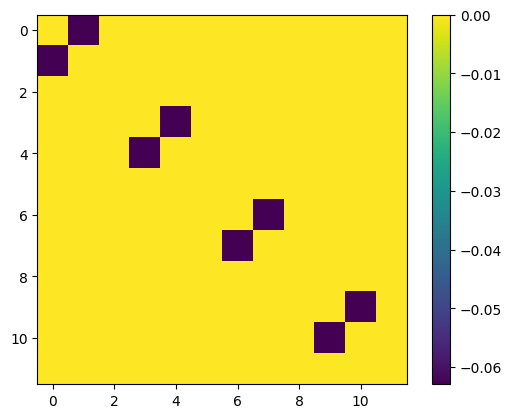

In [69]:
plt.imshow(np.real(ham.Hk(k[40], k[4],o='y')[0]))
plt.colorbar()

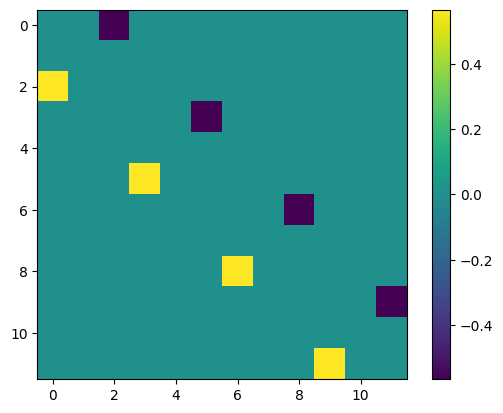

In [67]:
plt.imshow(np.imag(ham.Hk(k[40], k[0],o='x')[0]))
plt.colorbar()

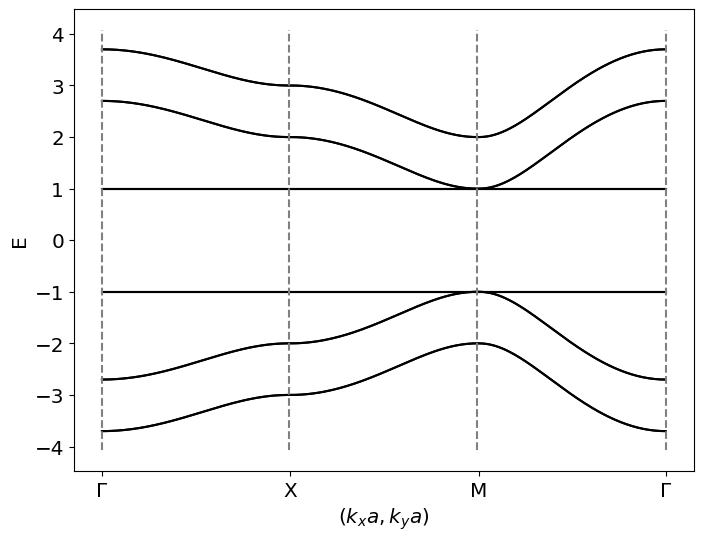

In [70]:
ham.plot_bands(k,p='all')

In [16]:
#ham.plot_bands(k,p='part')

In [17]:
k=np.linspace(0,2*np.pi, 50)
xarr = []
yarr = []
for i in k:
    for j in k:
        xarr.append(i)
        yarr.append(j)
np.shape(xarr)

(2500,)

In [18]:
E=ham.Es(k,p='all')

In [19]:
l=np.shape(k)[0]
l2 = np.shape(E)[0]
l2

124

In [20]:
E2=E.reshape(l2,l+1,l)[:,:0:-1,:]
E3 = E2.reshape(l2,l**2)

In [21]:
xticks = [0,l/2-1, l-1]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']
#xlabels = [r'-$\pi$',0, r'$\pi$']

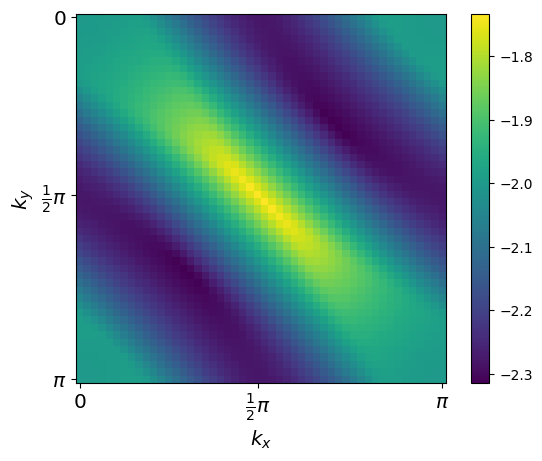

In [22]:
#plt.title('min ($E_{g,m}-E_{g,m+1}$)', size='x-large')
plt.xlabel(r'$k_x$', size='x-large')
plt.ylabel(r'$k_y$', size='x-large')
plt.xticks(ticks=xticks, labels= xlabels, size='x-large')
plt.yticks(ticks=xticks, labels=xlabels, size='x-large')

plt.imshow(E2[18])
plt.colorbar()

In [23]:
c=0
A = []
for i in E2:
    s=np.shape(np.abs(i)[np.abs(i)>1e-10])[0]
    A.append(s)
    if s==0:
        c+=1
c

0

In [24]:
c=0
A = []
for i in E2:
    s=np.std(i)
    A.append(s)
    if s<1e-10:
        c+=1
c

20

In [25]:
A

[0.040146311763017486,
 0.04014631176301739,
 0.040146311763017375,
 0.04014631176301726,
 0.09369955326925991,
 0.09369955326925986,
 0.09369955326925979,
 0.09369955326925973,
 0.13741136717413643,
 0.13741136717413616,
 0.13741136717413593,
 0.13741136717413574,
 0.038893445570020356,
 0.03889344557002035,
 0.03889344557002032,
 0.03889344557002031,
 0.1457296187129141,
 0.14572961871291418,
 0.14572961871291418,
 0.14572961871291423,
 0.06444115232633998,
 0.06444115232633998,
 0.06444115232634001,
 0.06444115232634001,
 0.06348819611101561,
 0.06348819611101585,
 0.06348819611101596,
 0.06348819611101619,
 0.11882206928259217,
 0.11882206928259238,
 0.11882206928259247,
 0.11882206928259263,
 0.1148212188993493,
 0.11482121889934942,
 0.11482121889934947,
 0.11482121889934956,
 0.05345647412915988,
 0.053456474129159916,
 0.05345647412915992,
 0.05345647412915997,
 0.05585789930346511,
 0.05585789930346518,
 0.05585789930346523,
 0.05585789930346529,
 0.19230171361049728,
 0.19230

In [26]:
l2

124

In [27]:
x = np.outer(np.linspace(0, 2*np.pi, 50), np.ones(50))
y = x.copy().T

In [28]:
xticks = [0,1/2*np.pi, np.pi]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']
xticks = [0,1/2*np.pi, np.pi]
xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']

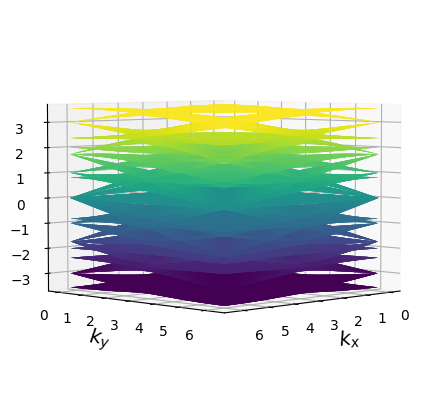

In [29]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$k_x$', size='x-large')
ax.set_ylabel(r'$k_y$', size='x-large')
ax.set_zlabel(r'E', size='x-large')
#ax.set_xticks(ticks=xticks, labels= xlabels, size='x-large')
#ax.set_yticks(ticks=xticks, labels=xlabels, size='x-large')


for i in E2:
    surf = ax.plot_surface(x,y, i, vmin=-3, vmax=3, cmap='viridis')
#fig.colorbar(surf)
ax.view_init(elev=4, azim=45, roll=0)
plt.show()

In [30]:
Earr = np.linspace(-4,4,20)

In [ ]:
DOS = np.zeros(20)
for i in range(l2):
    DOS+=ham.DOS(Earr,k, b=i,p='part')

IndexError: index 31 is out of bounds for axis 0 with size 31

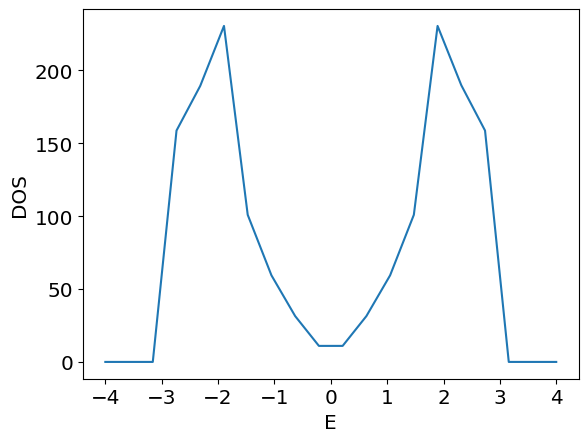

In [ ]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.xlim(-0.6, 0.6)
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.show()